### Context: 






This dataset is from Space Apps 2017's "You are my Sunshine" challenge1. It includes 4 months meteorological datas (September through December 2016) from the HI-SEAS Habitat in Hawai. By using this dataset, the most effective observations on radiation can be found.

### Content:

This dataset is a single csv with the following observations:

Radiation: Solar radiation (W/m^2)

Temperature: (°F)

Pressure: (Hg)

Humidity: (%)

WindDirection: (°)

Speed: (mph)

Sun Rise/Set Time: Hawaii time

### Inspiration:

1- Can solar radiation be predicted by this observations?

2- What is the most effective observation on solar radiation?

3- What is the least effective observation on solar radiation?

In [1]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

data = pd.read_csv('SolarPrediction.csv')
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [2]:
data.shape

(32686, 11)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [9]:
data.isna().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [3]:
#Check for correlation matrix which identify multicollinearity among numerical variables.

corr_dt = data.corr()
corr_dt

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
UNIXTime,1.000000,-0.081286,-0.369169,-0.332016,-0.063117,0.152613,0.173860
Radiation,-0.081286,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627
Temperature,-0.369169,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458
Pressure,-0.332016,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639
Humidity,-0.063117,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624
WindDirection(Degrees),0.152613,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092
Speed,0.173860,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000


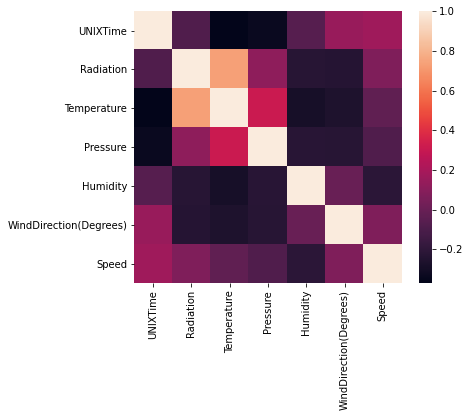

In [4]:
#Visualize the correlation

f, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr_dt, ax=ax)

In [5]:
#From the correlation matrix and correlation heatmap, we can see the presence of strong linear 
#correlation between the Radiation and Temperature and reverse correlation between Radiation and 
#Humidity.

In [96]:
pd.to_datetime(data.TimeSunRise)
pd.to_datetime(data.TimeSunSet)

0       2020-12-24 18:13:00
1       2020-12-24 18:13:00
2       2020-12-24 18:13:00
3       2020-12-24 18:13:00
4       2020-12-24 18:13:00
                ...        
32681   2020-12-24 17:42:00
32682   2020-12-24 17:42:00
32683   2020-12-24 17:42:00
32684   2020-12-24 17:42:00
32685   2020-12-24 17:42:00
Name: TimeSunSet, Length: 32686, dtype: datetime64[ns]

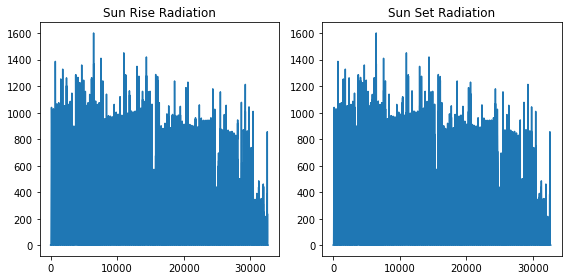

In [95]:
#Let's check Timesunrise/Timesunset and Radiation relation

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

_x_ = np.linspace(0,len(data.TimeSunRise), len(data.TimeSunRise))
axes[0].plot(_x_, data.Radiation)
axes[0].set_title('Sun Rise Radiation')

_y_ = np.linspace(1,len(data.TimeSunSet), len(data.TimeSunSet))
axes[1].plot(_y_, data.Radiation)
axes[1].set_title('Sun Set Radiation')

plt.tight_layout()

plt.show()


In [11]:
#It is obvious that Radiation has a relation with time of the day.

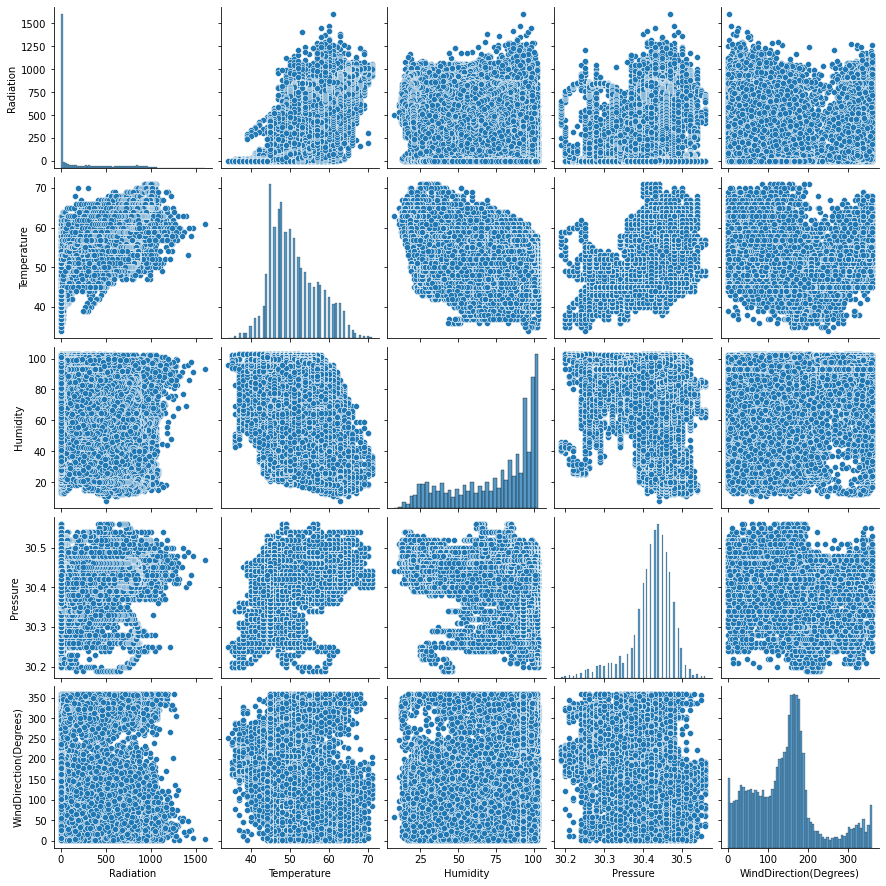

In [16]:
#Check for correlation plot

df = data[['Radiation', 'Temperature', 'Humidity', 'Pressure', 'WindDirection(Degrees)']]

sns.pairplot(df, kind="scatter")

plt.show()

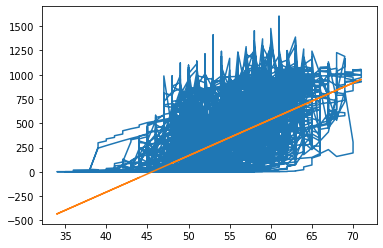

In [44]:
#Correlation test 

x = df.Temperature
y = df.Radiation
plt.plot(x, y)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)

In [41]:
#Let's calculate the correlation coefficient between Radiation and Temperature

np.corrcoef(x, y)

array([[1.        , 0.73495476],
       [0.73495476, 1.        ]])

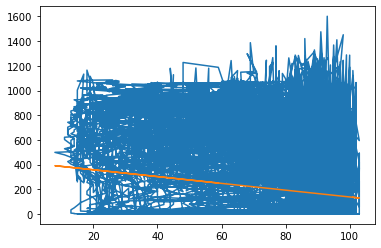

In [45]:
#Let's calculate the correlation coefficient between Radiation and Humidity

k = df.Humidity
l = df.Radiation

plt.plot(k, l)

c, d = np.polyfit(k, l, 1)
plt.plot(k, c*k+d)

In [46]:
#Let's see correlation coefficient for Radiation and Humidity

np.corrcoef(k, l)

array([[ 1.        , -0.22617065],
       [-0.22617065,  1.        ]])

### Conclusion

According to the our findings, Temperature is the highest effect on Solar Radiation. We can see that clearly from the graphs and correlation coefficient. 

However, there are other things to check. If we see the TimeSunRise and TimeSunSet graphs, there is a relation between the time of the day and Radiation. And a result of that day of the year, too. Since it is a dataset of 4 months, there is a skew on it. Based on this, it can be analyzed in detail, we can find beneficial knowledge if it is analyzed for more than 4 months, even years.

In addition, there is a reverse correlation between Humidity and Radiation. Likewise, we can see that WindDirection(Degrees) seems has a reverse correlation with Radiation. WindDirection can change according to the season of the year, and since there is a relation between wind and cloud, it causes changing on Solar Radiation. This can be checked in detail, too.